# Machine Learning Training : Unsupervised Clustering Algorithms

## Project3 => 

In [1]:
import kaggle
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN 
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
# SET YOUR OWN PATH WHERE YOU WANT TO KEEP DATASET
if platform.system() == "Linux":
    datasetDir = "/home/sanjayk/Documents/data/"
else:
    datasetDir = "/Users/sanjayk/Documents/data/"

In [3]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files("vjchoudhary7/customer-segmentation-tutorial-in-python", path=datasetDir, unzip=True) 

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


In [4]:
df = pd.read_csv(datasetDir + 'Mall_Customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income','Spending Score (1-100)': 'Score'}, inplace=True)

In [6]:
X = df.drop(['CustomerID','Gender'],axis=1)
X.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
X.shape

(200, 3)

In [8]:
### KMean

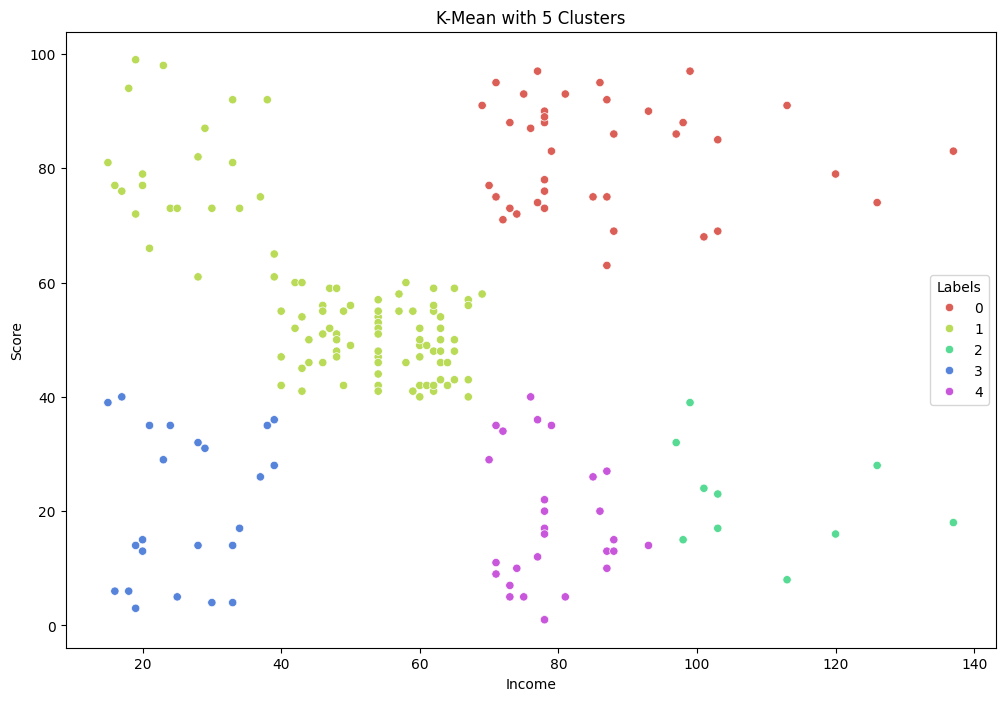

In [9]:
km = KMeans(n_clusters=5).fit(X)
X['Labels'] = km.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Income',y='Score', hue='Labels',palette=sns.color_palette('hls', 5))
plt.title('K-Mean with 5 Clusters')
plt.show()

In [10]:
#help(AgglomerativeClustering)

In [11]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
print(agglom.labels_)
print(agglom.n_leaves_)
#print(agglom.distances_ )

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 2 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
200


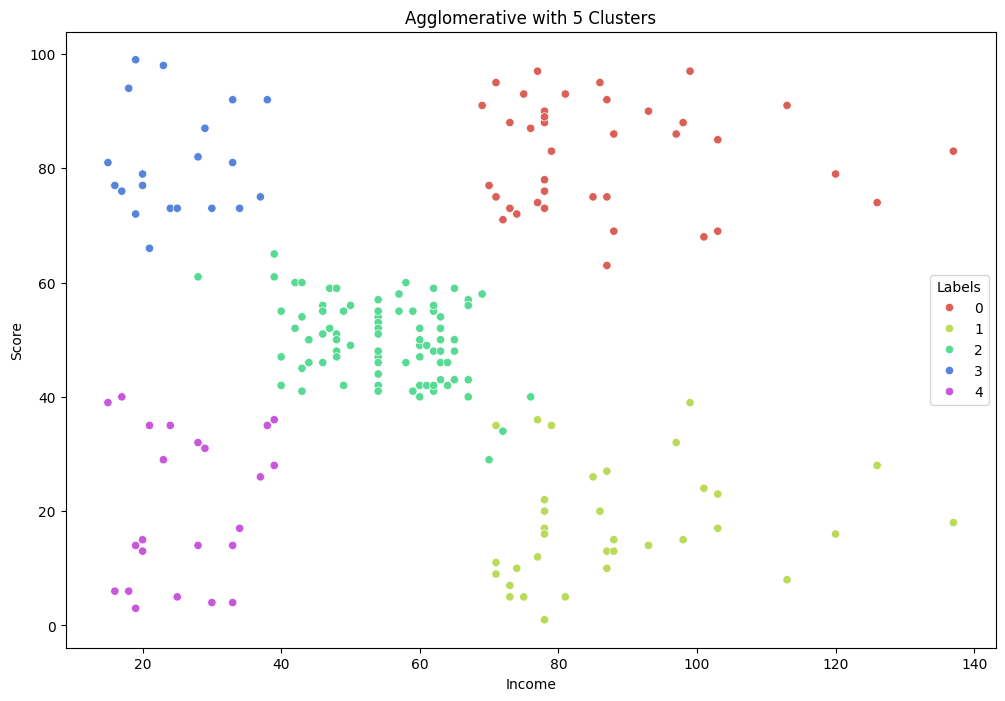

In [12]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Income',y='Score', hue='Labels',palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

/var/folders/2l/lf_6kmf16llf7yfntd36br0h0000gp/T/ipykernel_24027/1776690375.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


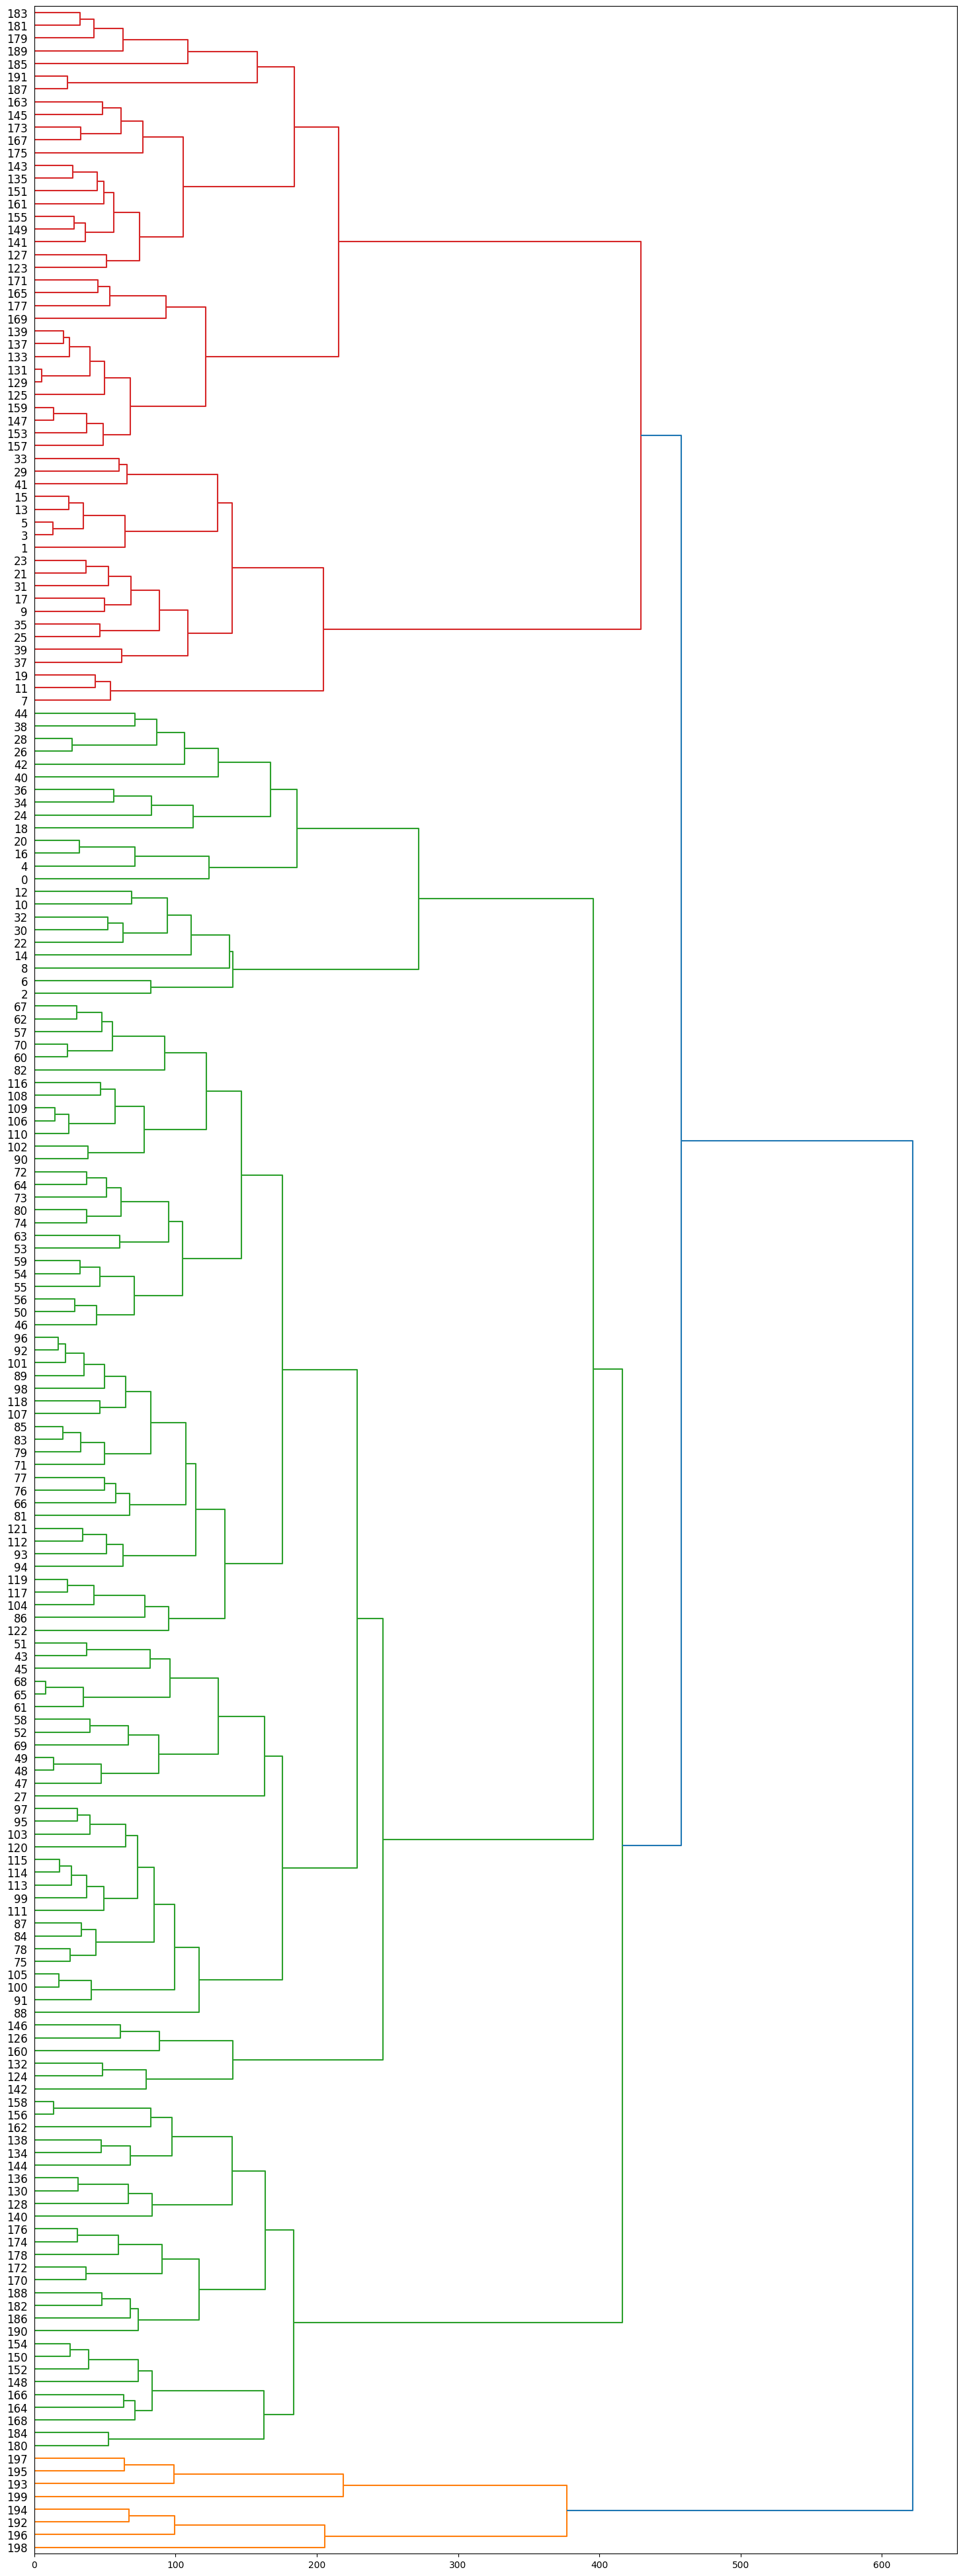

In [13]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

In [14]:
#help(DBSCAN)

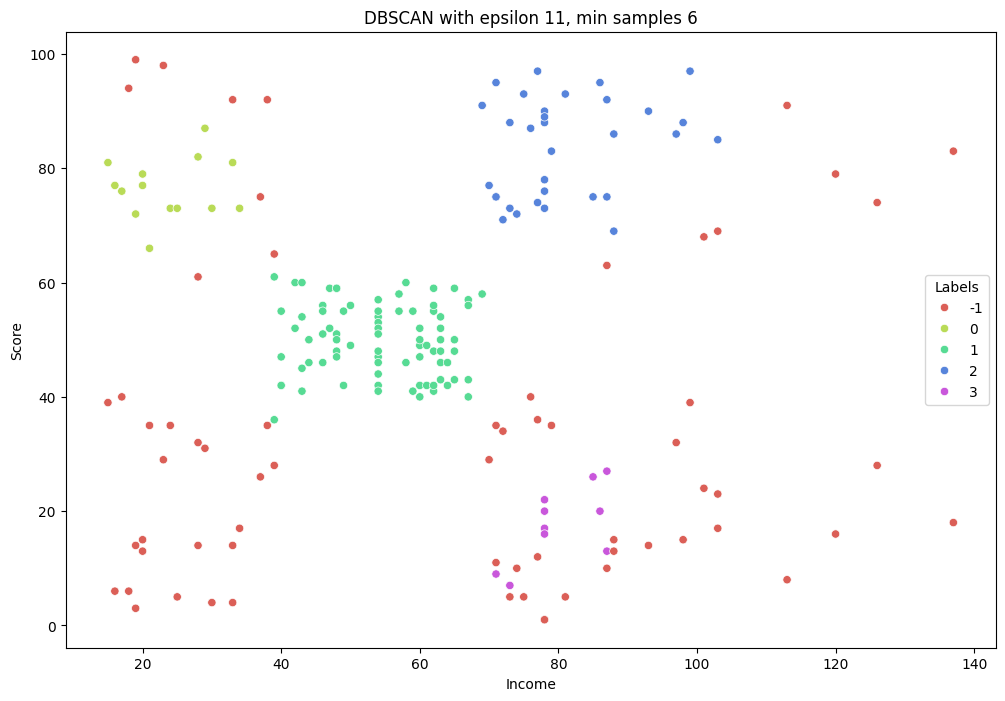

In [15]:
db = DBSCAN(eps=11, min_samples=6)
db.fit(X)
X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X,x='Income',y='Score',hue='Labels',palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

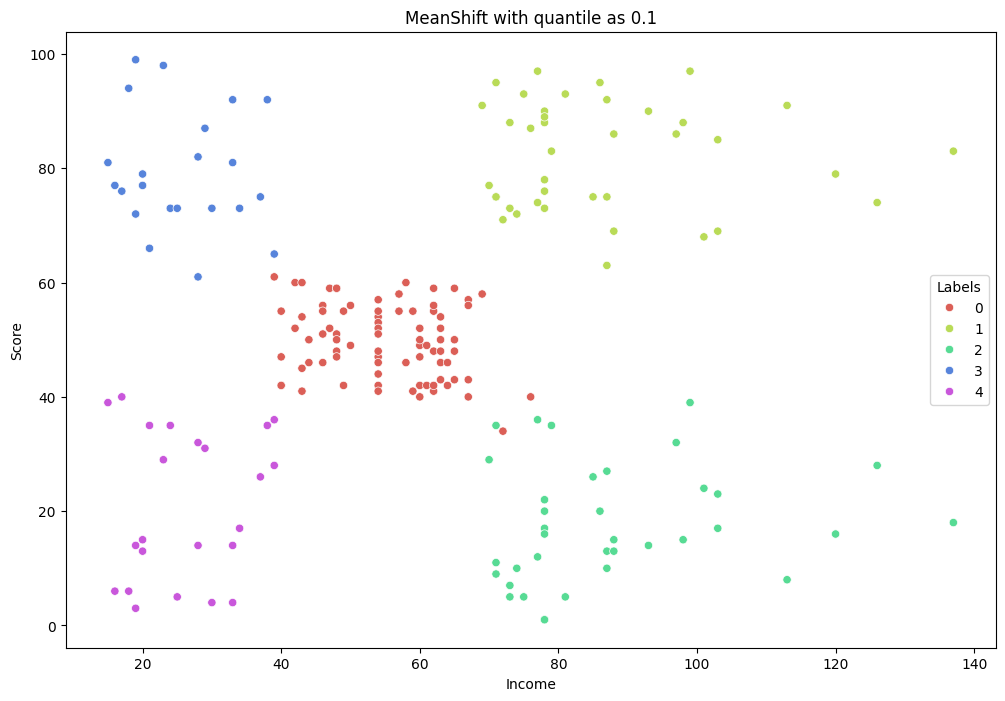

In [16]:
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)

X['Labels'] = ms.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(data=X,x='Income',y='Score',hue='Labels',palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.title('MeanShift with quantile as 0.1')
plt.show()

In [17]:
#help(estimate_bandwidth)
help(MeanShift)

Help on class MeanShift in module sklearn.cluster._mean_shift:

class MeanShift(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  MeanShift(*, bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)
 |  
 |  Mean shift clustering using a flat kernel.
 |  
 |  Mean shift clustering aims to discover "blobs" in a smooth density of
 |  samples. It is a centroid-based algorithm, which works by updating
 |  candidates for centroids to be the mean of the points within a given
 |  region. These candidates are then filtered in a post-processing stage to
 |  eliminate near-duplicates to form the final set of centroids.
 |  
 |  Seeding is performed using a binning technique for scalability.
 |  
 |  For an example of how to use MeanShift clustering, refer to:
 |  :ref:`sphx_glr_auto_examples_cluster_plot_mean_shift.py`.
 |  
 |  Read more in the :ref:`User Guide <mean_shift>`.
 |  
 |  Parameters
 |  ----------
 |  bandwidth : float, d

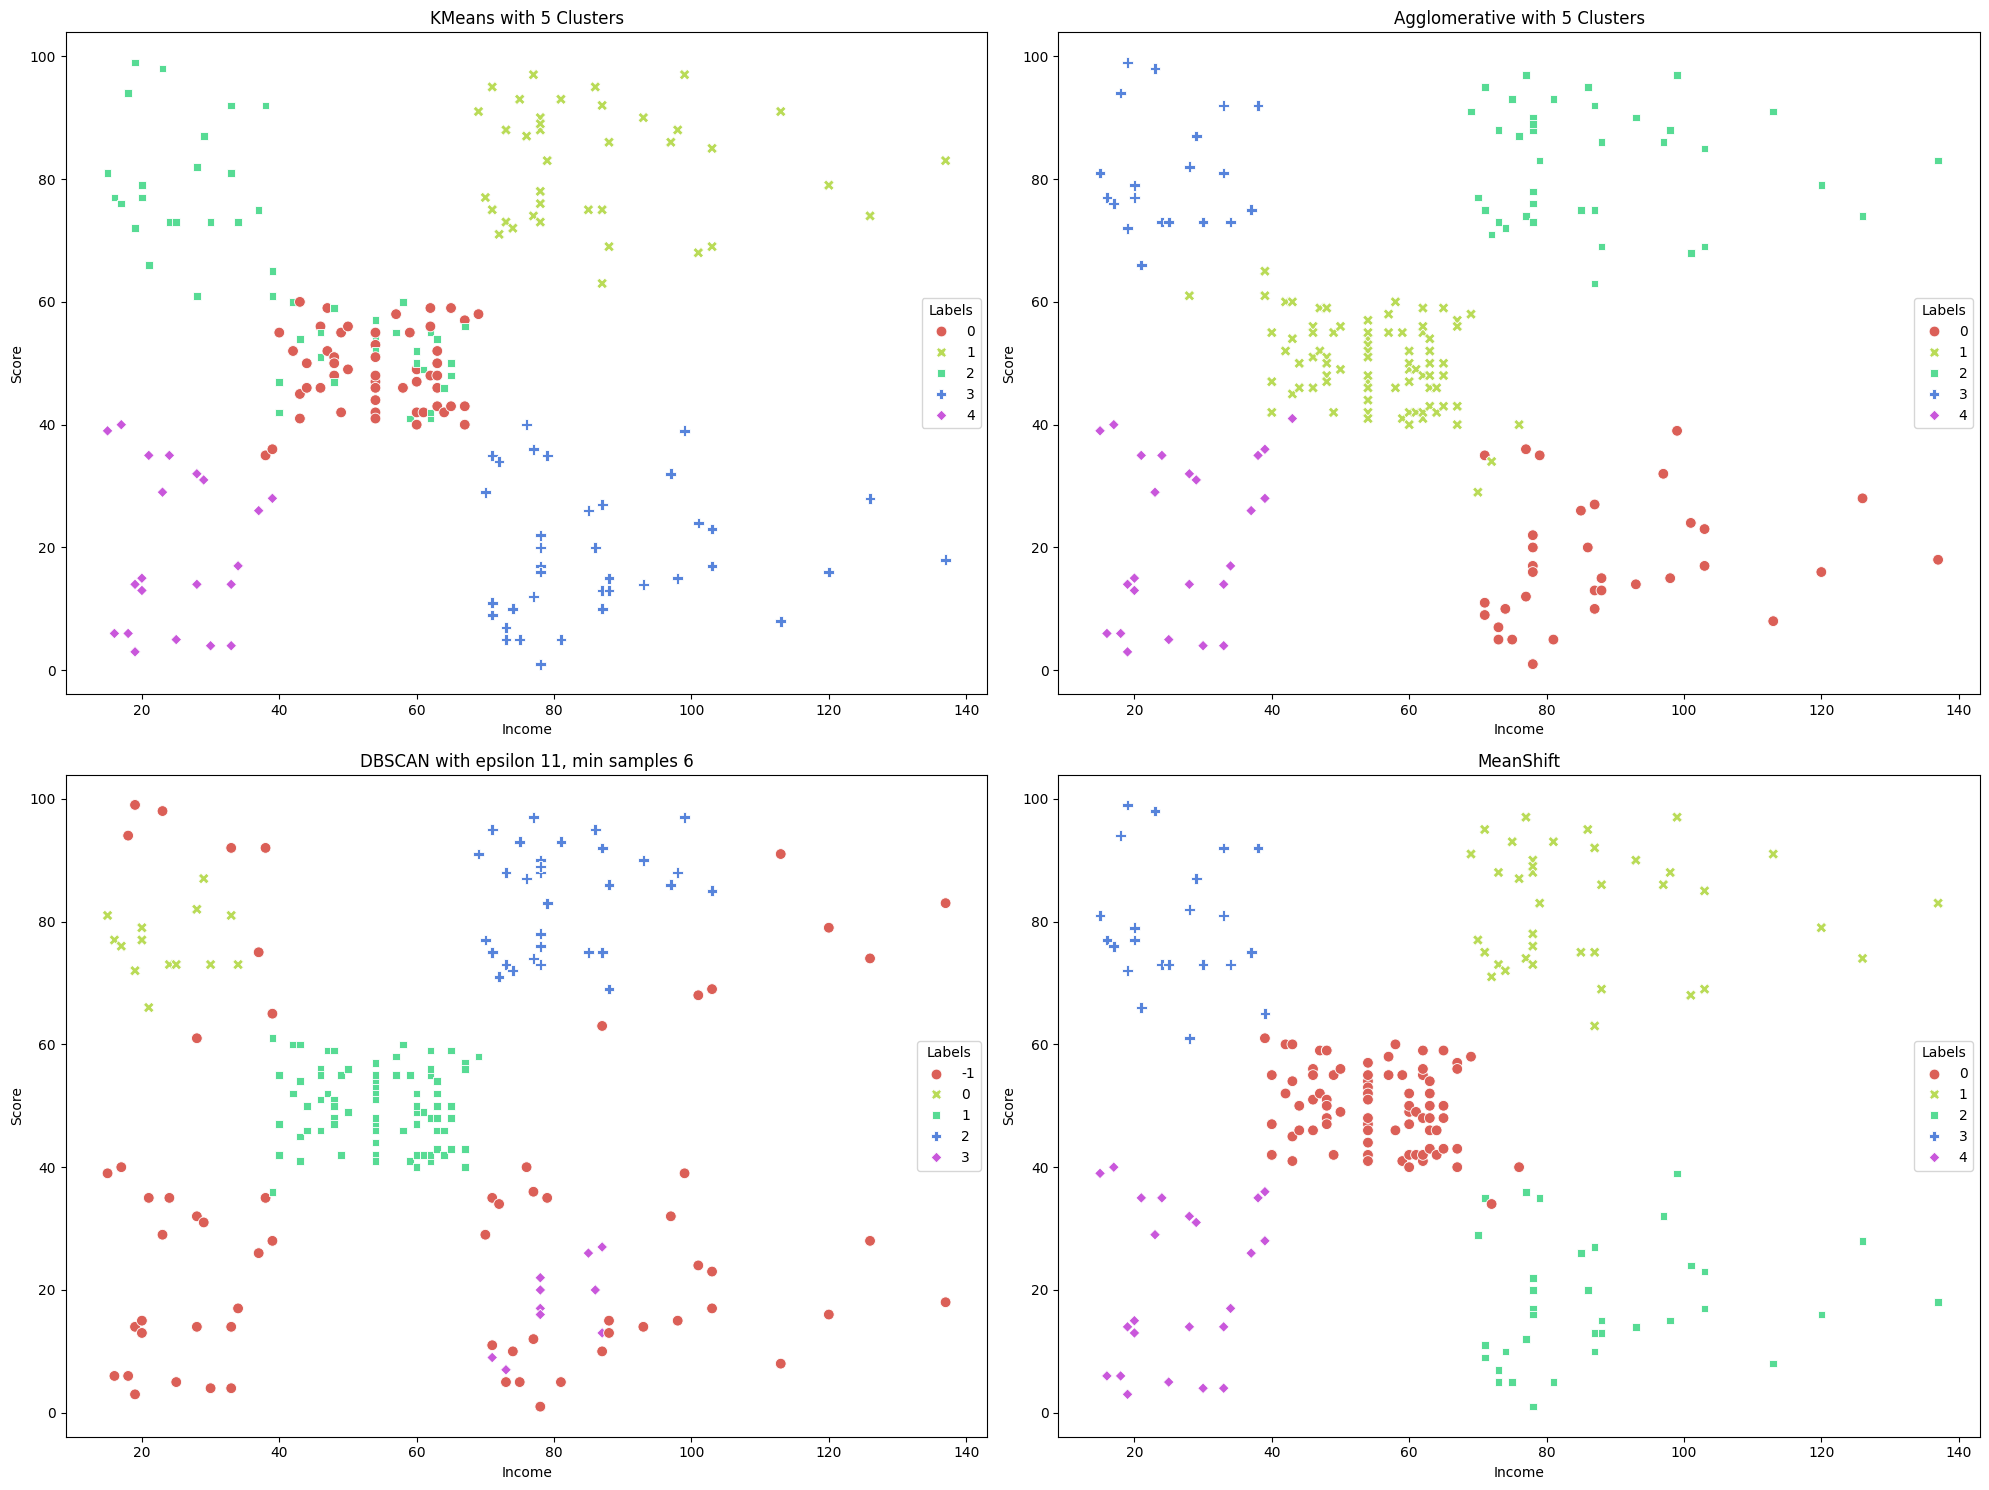

In [18]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(data=X, x='Income',y='Score',hue='Labels', style='Labels',
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(data=X, x='Income',y='Score',hue='Labels', style='Labels',
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(data=X, x='Income',y='Score',hue='Labels', style='Labels', s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(data=X, x='Income',y='Score',hue='Labels', style='Labels', s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()